In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.integrate import solve_ivp
import ast
from IPython import display

# The Solow-Swan Growth Model

## Model Description

In a Solow--Swan economy, agents save a fixed fraction of their current
incomes.

Savings sustain or increase the stock of capital.

Capital is combined with labor to produce output, which in turn is paid out to
workers and owners of capital.

To keep things simple, we ignore population and productivity growth.

For each integer $t \geq 0$, output $Y_t$ in period $t$ is given by $Y_t =
F(K_t, L_t)$, where $K_t$ is capital, $L_t$ is labor and $F$ is an aggregate
production function.

The function $F$ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

$$
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
$$

Production functions with this property include

* the **Cobb-Douglas** function $F(K, L) = A K^{\alpha}
  L^{1-\alpha}$ with $0 \leq \alpha \leq 1$ and
* the **CES** function $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$
        with $a, b, \rho > 0$.

We assume a closed economy, so aggregate domestic investment equals aggregate domestic
saving.

The saving rate is a constant $s$ satisfying $0 \leq s \leq 1$, so that aggregate
investment and saving both equal  $s Y_t$.

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $1-\delta$ units tomorrow.

Thus,

$$
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
$$


Without population growth, $L_t$ equals some constant $L$.

Setting $k_t := K_t / L$ and using homogeneity of degree one now yields

$$
    k_{t+1}
    = s \frac{F(K_t, L)}{L} + (1 - \delta) k_t
    = s F(k_t, 1) + (1 - \delta) k_t
$$


With  $f(k) := F(k, 1)$, the final expression for capital dynamics is

```{math}
:label: solow
    k_{t+1} = g(k_t)
    \text{ where } g(k) := s f(k) + (1 - \delta) k
```

Our aim is to learn about the evolution of $k_t$ over time,
given an exogenous initial capital stock  $k_0$.

## Schematic representation

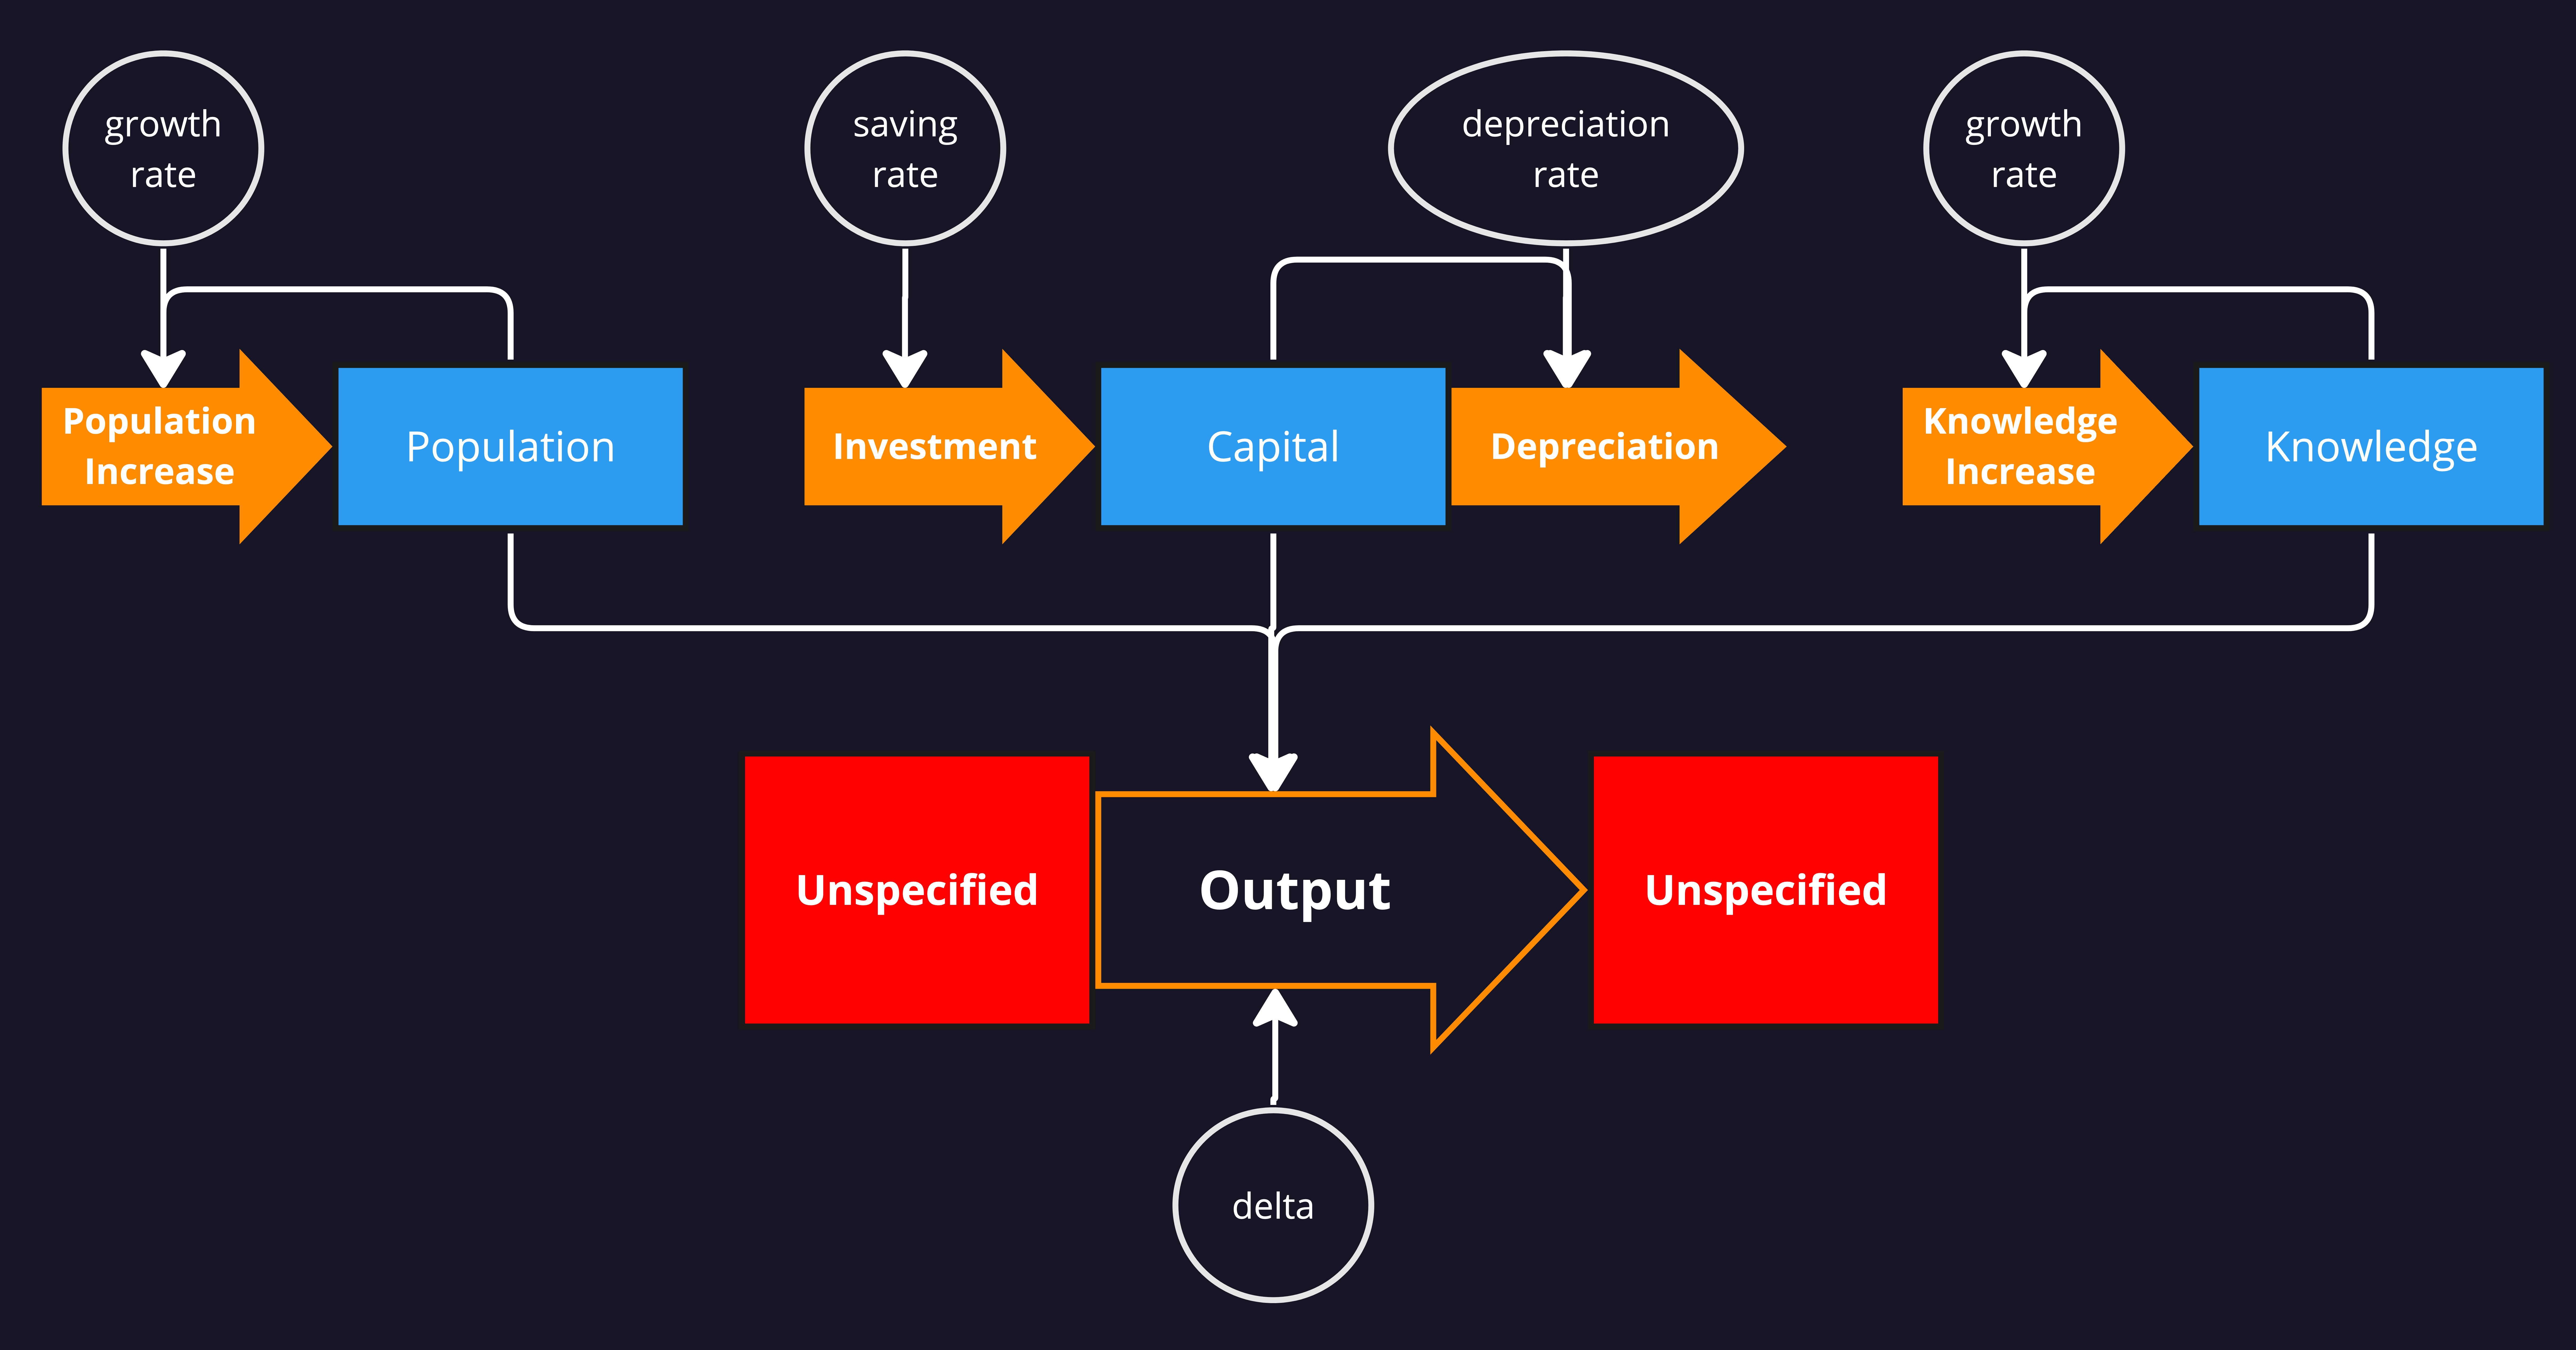

In [104]:
display.Image("/Users/danypineault/Documents/Book/book/image/Solow.jpg")

## Mathematical Model

### Stock variables

Our process has one financial stock variable: the “Capital” which captures the quantity of machines represented normally in dollars. While machine is a physical in practice, representing it in dollars abstract the variable from the physical world. Also note that population and knowledge are exogenous in this version of the model, and are then considered as exogenous information.

We represent the Capital as
\begin{align}
 K: K\in R, K \leq 0.
\end{align}


### Decision Variables

While in this model, the agents are not optimizing and thus making a decision, it is still helpfull to differentiate variables that would be included in a policy.

In this model, the only decision variables is the saving rate of the homehold agent which we represent as:

\begin{align}
 s: s\in R, 0 \leq s \leq 1.
\end{align}

### Exogenous information

Our model have two exogenous variables: 
- the Population represented as:
\begin{align}
 L: L\in R, L > 0.
\end{align}
- the Knowledge represented as:
\begin{align}
 A: A\in R, A > 0.
\end{align}

and 2 parameters:
- the growth rate of the Population represented as:
\begin{align}
 L_g: L_g\in R, 0 \leq L_g \leq 1.
\end{align}
- the growth rate of Knowledge represented as:
\begin{align}
 A_g: A_g\in R, 0 \leq A_g \leq 1.
\end{align}


### Dynamics of the model


The function $F$ is assumed to be nonnegative and
**homogeneous of degree one**, meaning
that

\begin{align}
    F(\lambda K, \lambda L) = \lambda F(K, L)
    \quad \text{for all } \lambda \geq 0
\end{align}

Production functions with this property include

* the **Cobb-Douglas** function $F(K, L) = A K^{\alpha}
  L^{1-\alpha}$ with $0 \leq \alpha \leq 1$ and
* the **CES** function $F(K, L) = \left\{ a K^\rho + b L^\rho \right\}^{1/\rho}$
        with $a, b, \rho > 0$.

Aggregate investment is a intermediary variables and equal  
\begin{align}
s Y_t
\end{align}

Capital depreciates: without replenishing through investment, one unit of capital today
becomes $1-\delta$ units tomorrow. Thus,
\begin{align}
    K_{t+1} = s F(K_t, L_t) + (1 - \delta) K_t
\end{align}


Population dynamics is 

\begin{align}
L_t = L_g L_{t-1}
\end{align}
and Knowledge dynamics
\begin{align}
A_t = A_g A_{t-1}
\end{align}

## Ordinary Differential Equations Representation

\begin{align*}
Y &= A K^{\alpha} P^{1 - \alpha} \\
I &= s Y \\
\frac{dL}{dt} &= L_g L \\
\frac{dA}{dt} &= A_g A \\
\frac{dK}{dt} &= I - \delta K 
\end{align*} 

## Python Implementation

In [2]:
def getOde(code, env):
    tree = ast.parse(code)
    code_obj = compile(tree, filename='', mode='exec')
    exec(code_obj, env)

In [16]:
def runContinuous(env):
    code = """
import numpy as np
from scipy.integrate import solve_ivp

def odes3(t, x, p):
    s, alpha, delta, g_p, g_a = 0.3, 0.3, 0.4, 0.02, 0.03

    P = x[0]
    K = x[1]
    A = x[2]

    Y = A * (K**alpha) * (P**(1 - alpha))
    I = s * Y
    
    dP_dt = g_p * P
    dA_dt = g_a * A
    dK_dt = I - K * delta
    
    
    return [dP_dt, dK_dt, dA_dt]
    
t = np.arange(0, 50, 1)
P, A = 1, 2
x0 = [P, K, A]
res = solve_ivp(odes3, [0, 50], x0, t_eval=t, args=(0.02,), dense_output=True)
    
"""
    
    getOde(code, env)

In [17]:

def plot(x, y, title):
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title=title
    )
    
    
    fig.add_trace(go.Scatter(x=x, y=y,
                            mode='lines',
                            name="Pop"))
    fig.show()


## Model Analysis

### Version 1 - No Population and Knowledge Growth

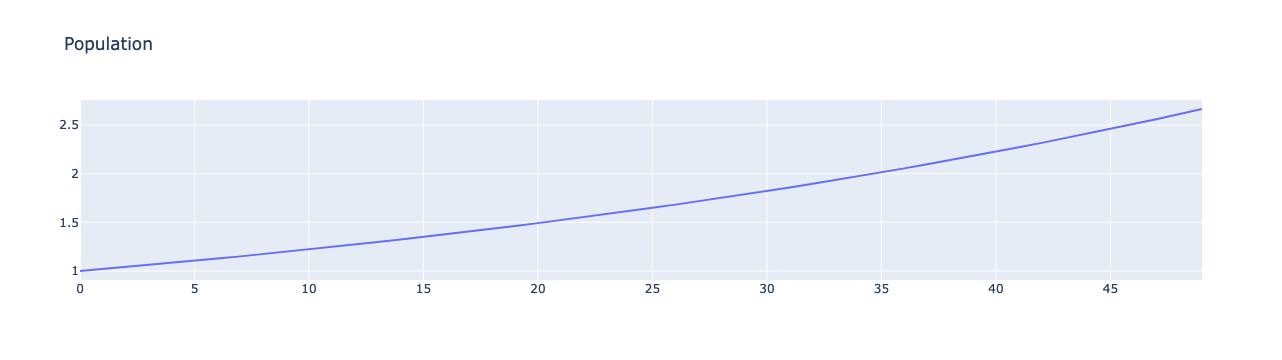

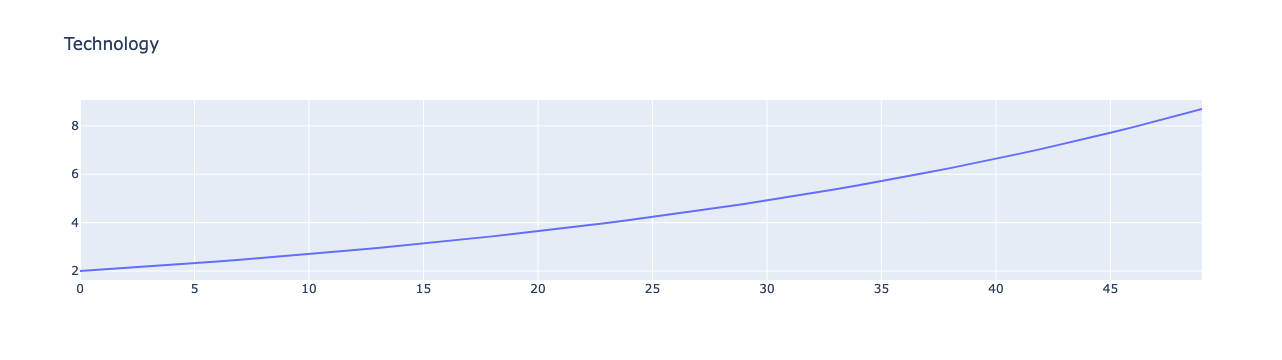

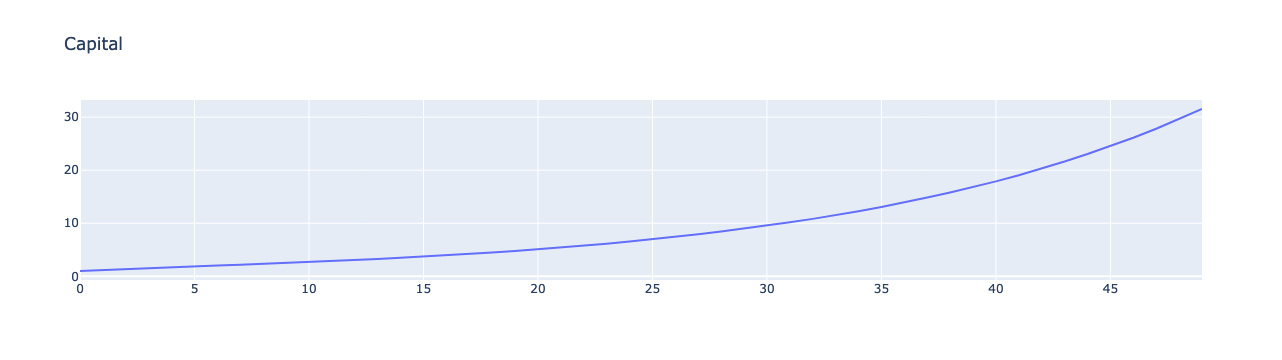

In [18]:
env = {'K':1}
runContinuous(env)
plot(env["res"].t, env["res"].y[0], "Population")
print("")
plot(env["res"].t, env["res"].y[2], "Technology")
print("")
plot(env["res"].t, env["res"].y[1], "Capital")

In [19]:
def sim(xs_init):
        
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title="Equilibrium"
    )
    for x in xs_init:
        env = {'K': x} 
        runContinuous(env)
    
        fig.add_trace(go.Scatter(x=env["res"].t, y=env["res"].y[1],
                            mode='lines',
                            name="{}".format(x)))
    fig.show()

### Equilibrium

While there an easy analytical way to find the equilibrium, we will focus on the dynamics of the systems. One question we can ask ourselves is the Model converge to a single point whatever the initial value for our Capital (K). Let simulate with 3 initial values: 0.25, 1.25, 3.25.

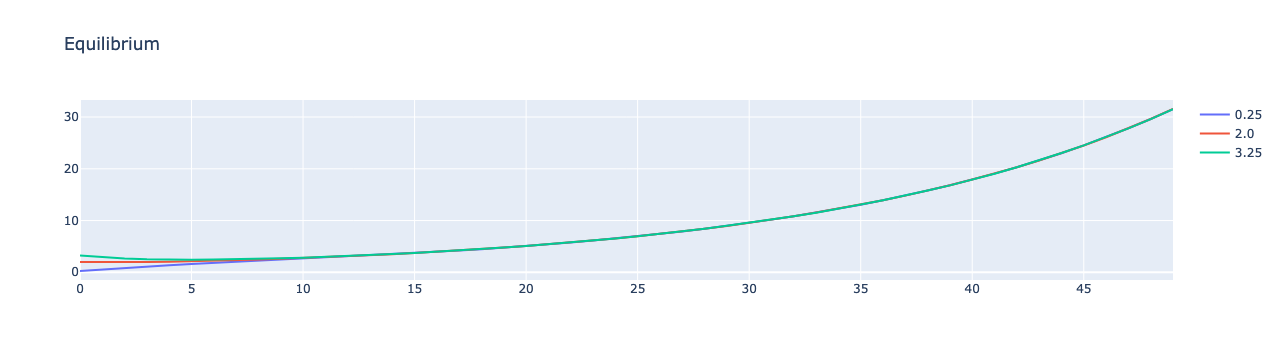

In [20]:
sim([0.25, 2.0, 3.25])